In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weekly_sim_log_df = pd.read_json("data/10_weeks/logfile_matched_trips_week_0.log", lines=True)

In [3]:
weekly_sim_log_df.shape

(2344, 10)

In [4]:
weekly_sim_log_df.columns

Index(['square_index', 'rider_id', 'driver_idx', 'trip_start_timestamp',
       'trip_duration', 'ride_miles', 'trip_end_timestamp', 'price_of_ride',
       'rider_acceptance_prob', 'driver_acceptance_prob'],
      dtype='object')

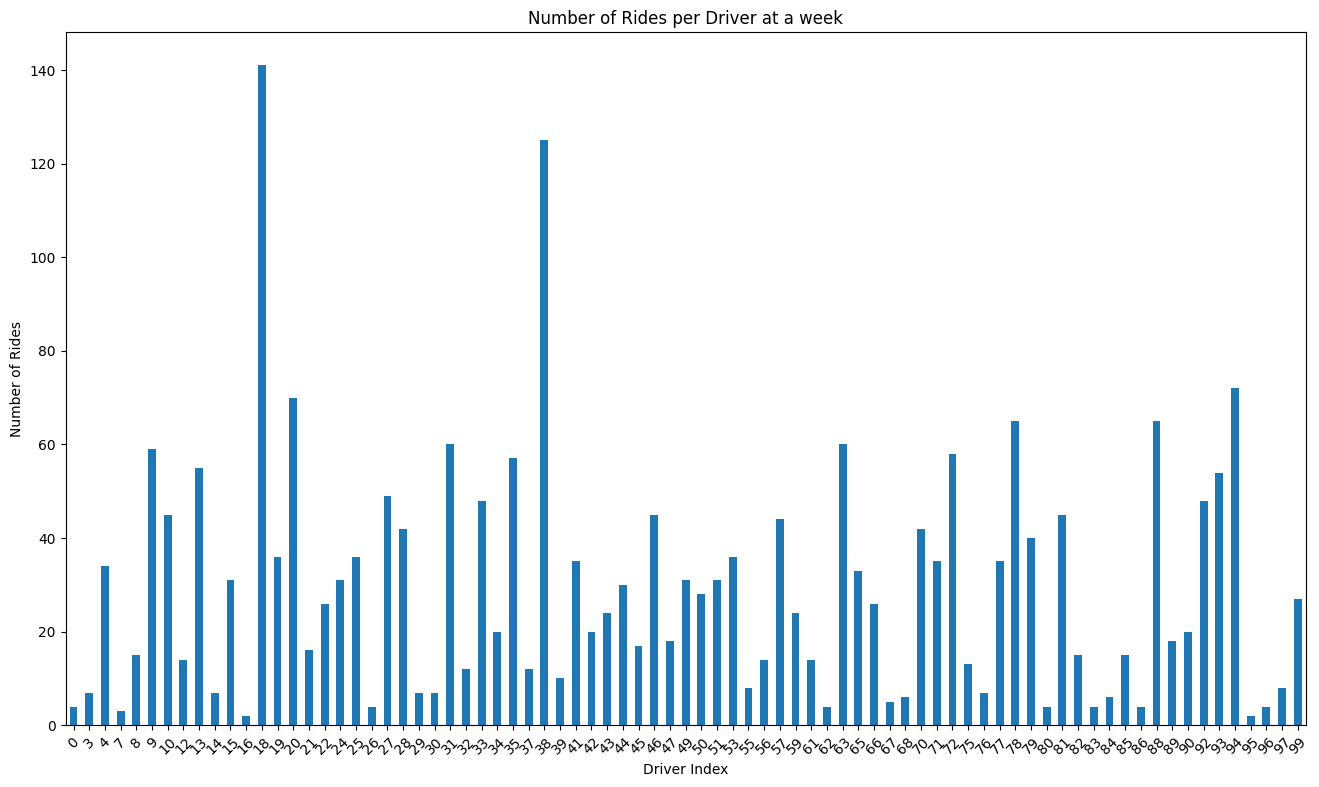

In [5]:
weekly_riders_per_driver = weekly_sim_log_df.groupby('driver_idx')['rider_id'].count()
weekly_riders_per_driver.plot(kind='bar', figsize=(16, 9))
plt.xlabel('Driver Index')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Driver at a week')
plt.xticks(rotation=45)
plt.show()

### as shown below, on avg. a driver did 30 riders per week

In [6]:
weekly_sim_log_df.groupby('driver_idx')['rider_id'].count().mean()

29.670886075949365

In [7]:
### multi-normal distribution on 8am(480) and 6pm(1080)

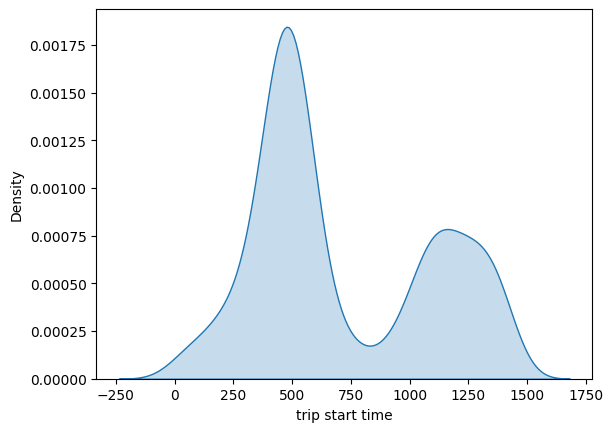

In [8]:
sns.kdeplot(data=weekly_sim_log_df['trip_start_timestamp'], fill=True)
plt.xlabel('trip start time')
plt.show()

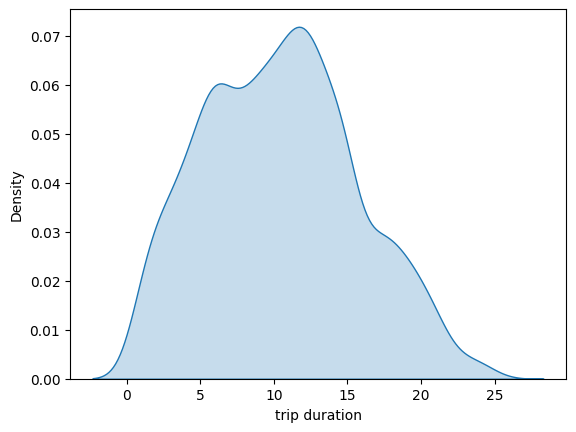

In [9]:
sns.kdeplot(data=weekly_sim_log_df['trip_duration'], fill=True)
plt.xlabel('trip duration')
plt.show()

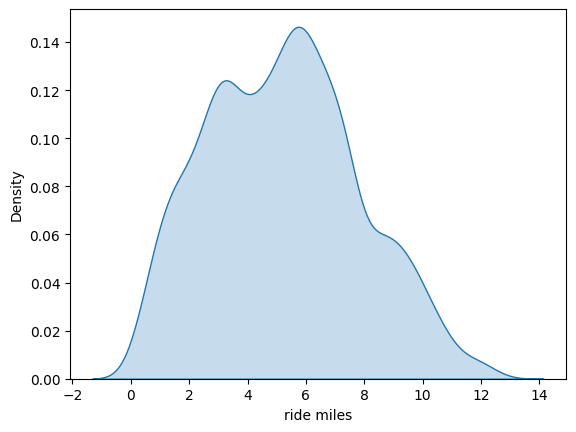

In [10]:
sns.kdeplot(data=weekly_sim_log_df['ride_miles'], fill=True)
plt.xlabel('ride miles')
plt.show()

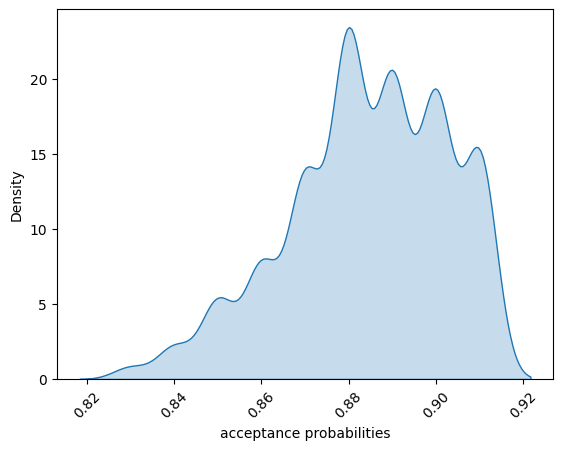

In [11]:
sns.kdeplot(data=weekly_sim_log_df['rider_acceptance_prob'], fill=True)
plt.xlabel('acceptance probabilities')
plt.xticks(rotation=45) 
plt.show()

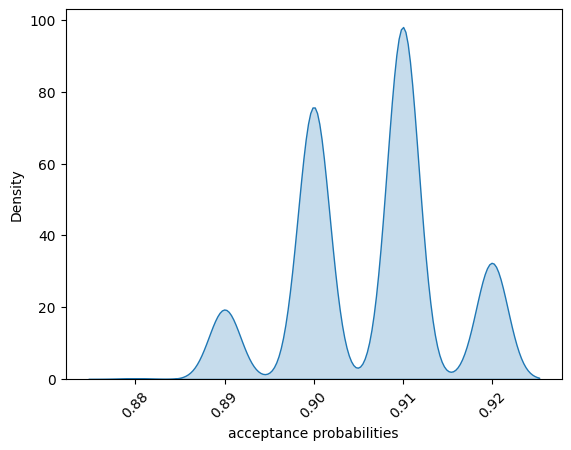

In [12]:
sns.kdeplot(data=weekly_sim_log_df['driver_acceptance_prob'], fill=True)
plt.xlabel('acceptance probabilities')
plt.xticks(rotation=45) 
plt.show()

### not sure how to analyze acceptance prob. for riders and drivers 

### as below, the ride share company makes $6.78 per ride

In [13]:
round(weekly_sim_log_df['price_of_ride'].mean(), 2), weekly_sim_log_df['price_of_ride'].sum()

(22.61, 53007.43)

In [14]:
round(weekly_sim_log_df['price_of_ride'].mean()*0.3, 2)

6.78